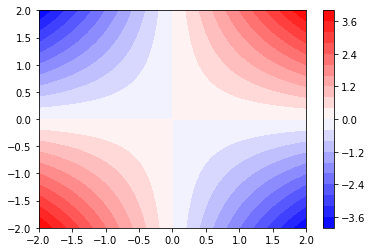

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define custom colormap (Blue for low values, White near 0, Red for high values)
RuBu = LinearSegmentedColormap.from_list("BlueWhiteRed", ["blue", "white", "red"], N=256)

# Create sample data
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = X * Y  # Example data with negative and positive values

# Apply colormap in contourf
plt.contourf(X, Y, Z, cmap=RuBu, levels=20)
plt.colorbar()
plt.show()


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

def read_data(hetero, Input_path1, Input_path2, Correlation_path):
    
    # Read inputs and correlation .csv files
    Input_dat1 = pd.read_csv(Input_path1, skiprows=1, header=None)
    Input_dat2 = pd.read_csv(Input_path2, skiprows=1, header=None) if hetero else None
    Corre_data = pd.read_csv(Correlation_path, header=None)
    
    Corre_x = Corre_data.iloc[0, 1:].astype(float).values
    Corre_y = Corre_data.iloc[1:, 0].astype(float).values
    Corre_d = Corre_data.iloc[1:, 1:].astype(float).values
    
    I_wav1= Input_dat1.iloc[:, 0] 
    I_val1 = Input_dat1.iloc[:, 1:] # Columns except the first one
    I_Avg1 = I_val1.mean(axis=1)
    
    if hetero:
        I_wav2 = Input_dat2.iloc[:, 0]
        I_val2 = Input_dat2.iloc[:, 1:]
        I_Avg2 = I_val2.mean(axis=1)
    else: 
        I_wav2 = None
        I_Avg2 = None
    
    Correlation = [Corre_x, Corre_y, Corre_d]
    Input = [I_wav1, I_Avg1, I_wav2, I_Avg2]

    
    return Correlation, Input

def init_figure(title):
    
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle(title, fontsize=16, y=0.95)
    
    gs = GridSpec(2, 2, width_ratios=[1, 4], height_ratios=[1, 4], hspace=0.2, wspace=0.20)
    
    # Top subplot
    ax_T = fig.add_subplot(gs[0, 1])
    ax_T.set_ylabel("Intensity")
    ax_T.set_frame_on(True)
    ax_T.invert_xaxis()
    ax_T.spines['top'].set_color('black')
    ax_T.spines['bottom'].set_color('black')
    ax_T.spines['left'].set_color('black')
    ax_T.spines['right'].set_color('black')
    ax_T.set_xticks([])
    
    # Lefthand subplot
    ax_L = fig.add_subplot(gs[1, 0])
    ax_L.set_ylabel("Intensity")
    ax_L.set_frame_on(True)
    ax_L.invert_xaxis()
    ax_L.spines['top'].set_color('black')
    ax_L.spines['bottom'].set_color('black')
    ax_L.spines['left'].set_color('black')
    ax_L.spines['right'].set_color('black')
    ax_L.set_yticks([])
    
    # Main correlation map
    ax_main = fig.add_subplot(gs[1, 1])
    ax_main.set_xlabel("Wavenumber (cm⁻¹)", labelpad=10)  # Move label above subplot
    ax_main.xaxis.set_label_position('top')  
    ax_main.set_ylabel("Wavenumber (cm⁻¹)")
    ax_main.invert_xaxis()
    ax_main.xaxis.set_ticks_position('top')  
    ax_main.spines['top'].set_color('black')
    ax_main.spines['bottom'].set_color('black')
    ax_main.spines['left'].set_color('black')
    ax_main.spines['right'].set_color('black')
    

    return fig

def COS_Plot(hetero=False, Input_path1=None, Input_path2=None, Correlation_path=None, 
             title="Untitled", colour=None, levels=3, CLines=True):


    # Read data
    Corre_data, Input_data = read_data(hetero, Input_path1, Input_path2, Correlation_path)
        
    # Initialize figure
    fig = init_figure(title)

    # Unpack subplots
    ax_list = fig.get_axes()
    ax_Top, ax_Left, ax_main = ax_list
        
    # Plot data
    ax_Top.plot(Input_data[0], Input_data[1], color='black', linewidth=1.5)
    ax_Top.set_xlim([Input_data[0].max(), Input_data[0].min()])
        
    if hetero == True:
            
        ax_Left.plot(Input_data[3], Input_data[2], color='black', linewidth=1.5)
        ax_Left.set_ylim([Input_data[2].min(), Input_data[2].max()])
            
    elif hetero == False:
            
            ax_Left.plot(Input_data[1], Input_data[0], color='black', linewidth=1.5)
            ax_Left.set_ylim([Input_data[0].min(), Input_data[0].max()])
    
    else:
        raise ValueError("Invalid value for 'hetero'. It should be either True or False.")     
        
    # mesh = ax_main.pcolormesh(Corre_data[0], Corre_data[1], Corre_data[2], shading='auto', cmap=colour, levels=3)
    mesh = ax_main.contourf(Corre_data[0], Corre_data[1], Corre_data[2], levels=levels, cmap=colour)
    if CLines == True:
        contours = ax_main.contour(Corre_data[0], Corre_data[1], Corre_data[2], levels=levels, colors="black", linewidths=0.5)
        
    # Define diagonal
    x_min, x_max = Corre_data[0].min(), Corre_data[0].max()
    y_min, y_max = Corre_data[1].min(), Corre_data[1].max()
    ax_main.plot([x_min, x_max], [y_min, y_max], linestyle="--", color="black", linewidth=0.75)

    # create colourbar
    divider = make_axes_locatable(ax_main)
    cax = fig.add_axes([0.95, 0.1175, 0.03, 0.55])
    cbar = fig.colorbar(mesh, cax=cax, orientation='vertical')
    cbar.set_label("Correlation Intensity")

    
    return

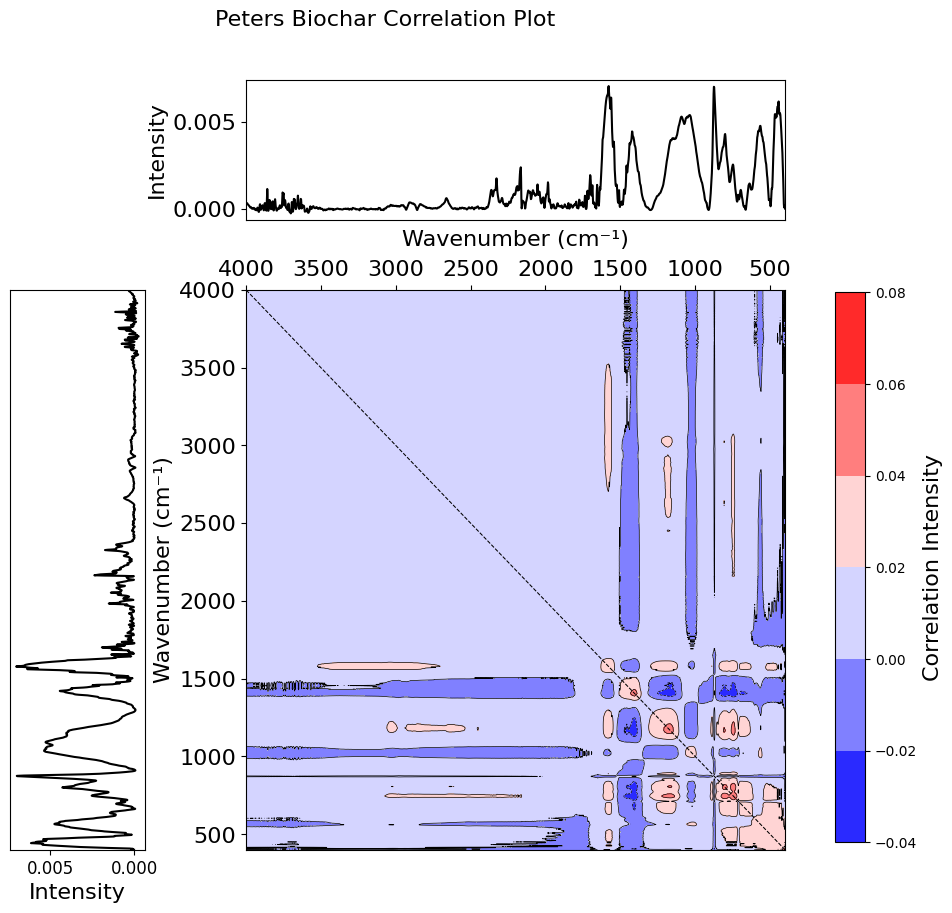

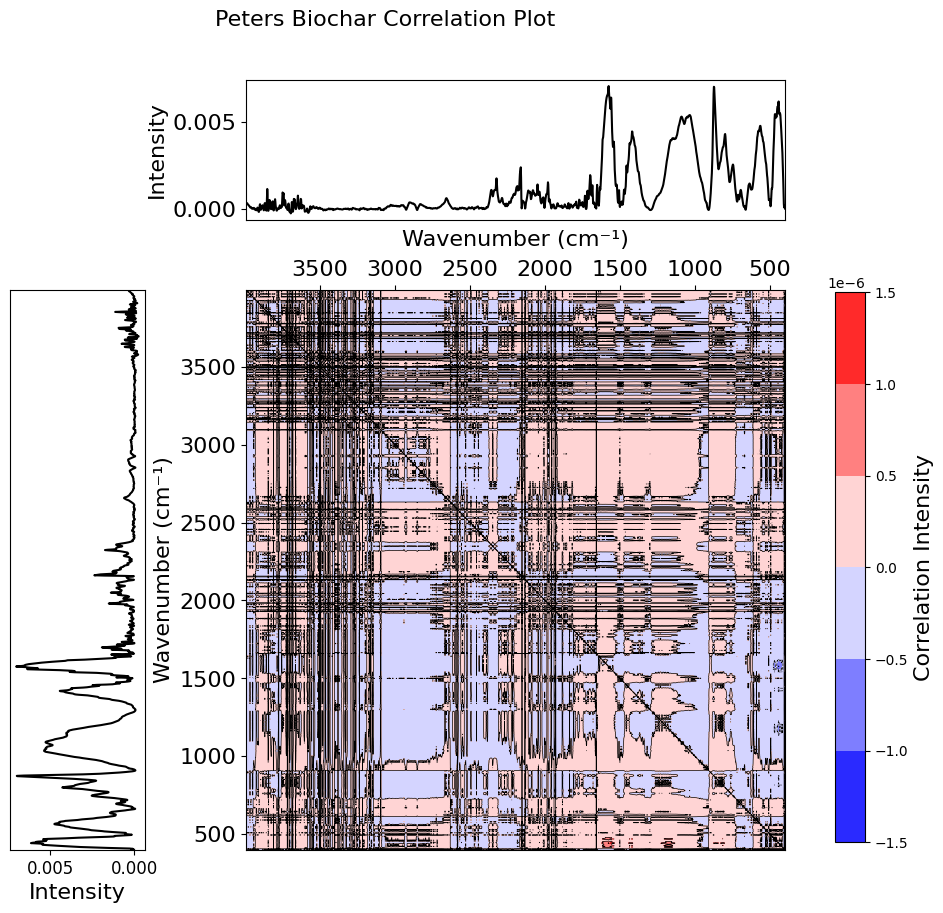

In [35]:
COS_Plot(hetero=False, title='Peters Biochar Correlation Plot', Input_path1='Peters_combined.csv', 
         Correlation_path='Shige test.csv', levels=4, colour=RuBu)
COS_Plot(hetero=False, title='Peters Biochar Correlation Plot', Input_path1='Peters_combined.csv', 
         Correlation_path='Peters AMesh.csv', levels=4, colour=RuBu)

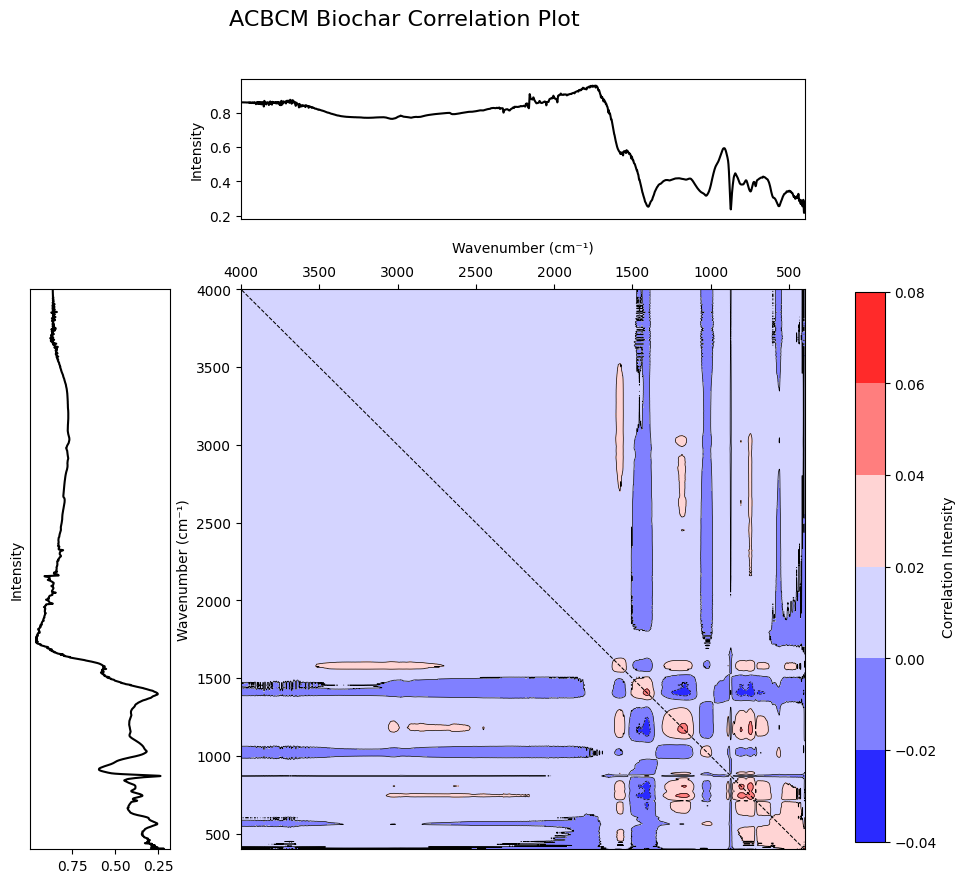

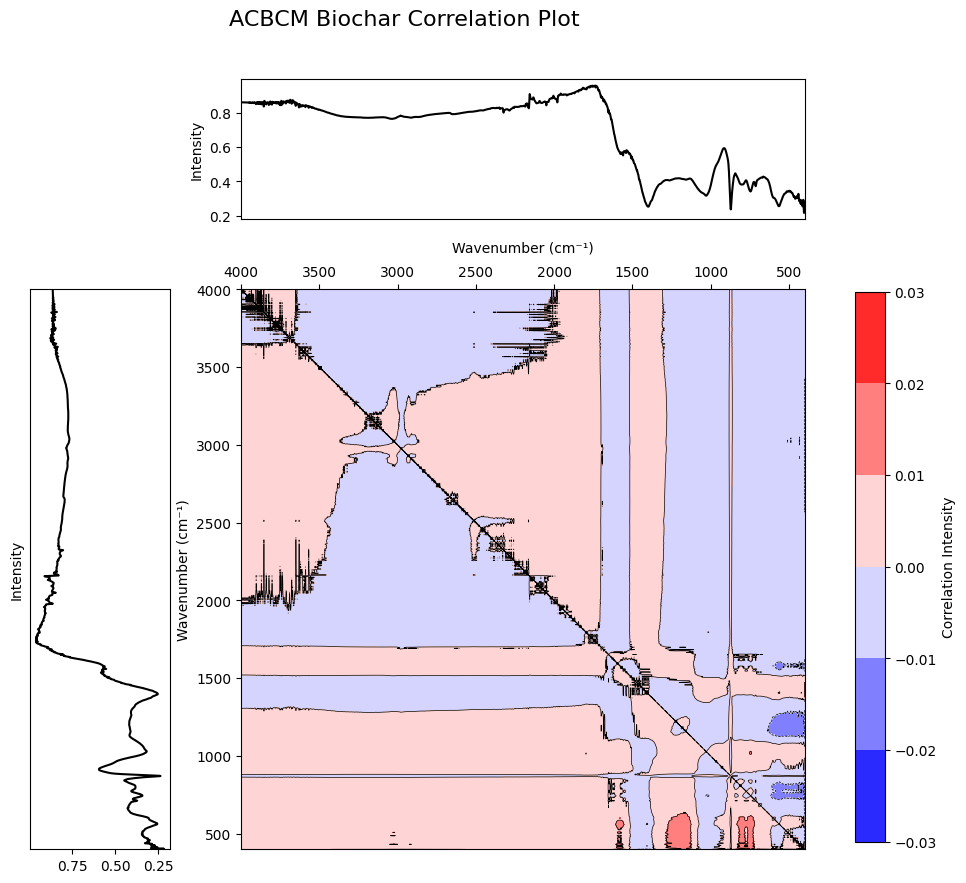

In [11]:
COS_Plot(hetero=False, title='ACBCM Biochar Correlation Plot', Input_path1='ACBCM_C.csv', 
         Correlation_path='ACBCM Mesh.csv', levels=4,  colour=RuBu)
COS_Plot(hetero=False, title='ACBCM Biochar Correlation Plot', Input_path1='ACBCM_C.csv', 
         Correlation_path='ACBCM AMesh.csv', levels=4,  colour=RuBu)

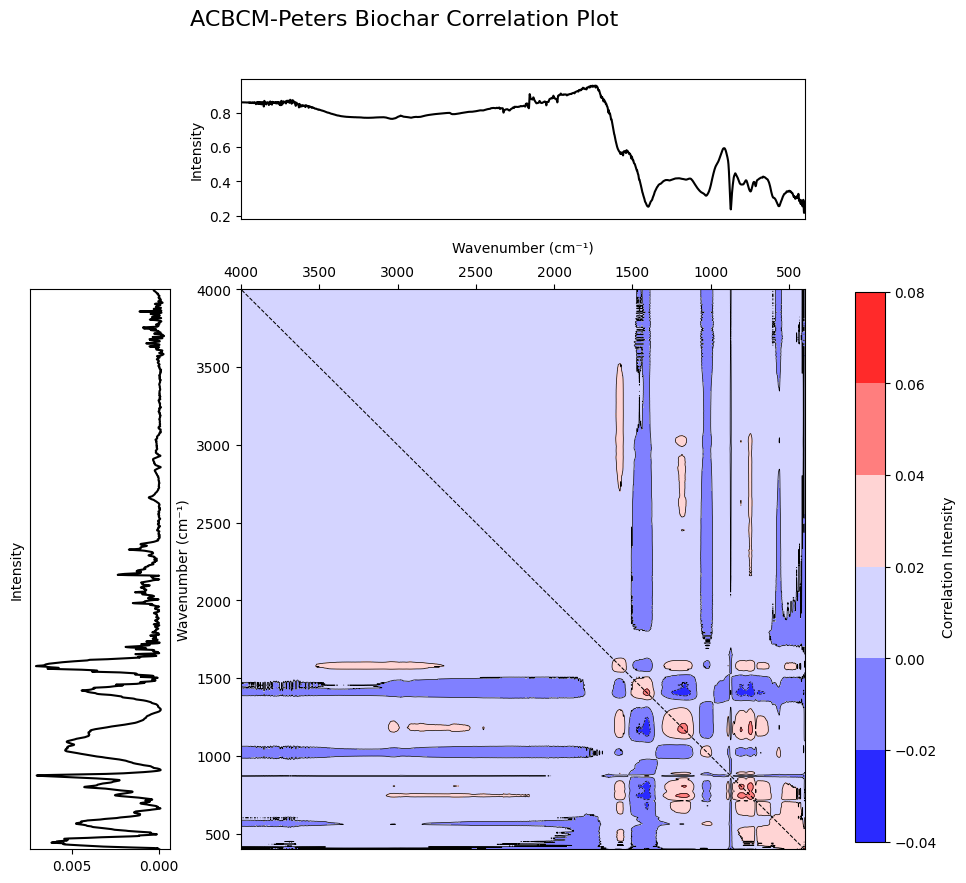

In [13]:
COS_Plot(hetero=True, title='ACBCM-Peters Biochar Correlation Plot', Input_path1='ACBCM_C.csv', Input_path2='Peters_combined.csv', 
         Correlation_path='ACBCM Mesh.csv', levels=4,  colour=RuBu)

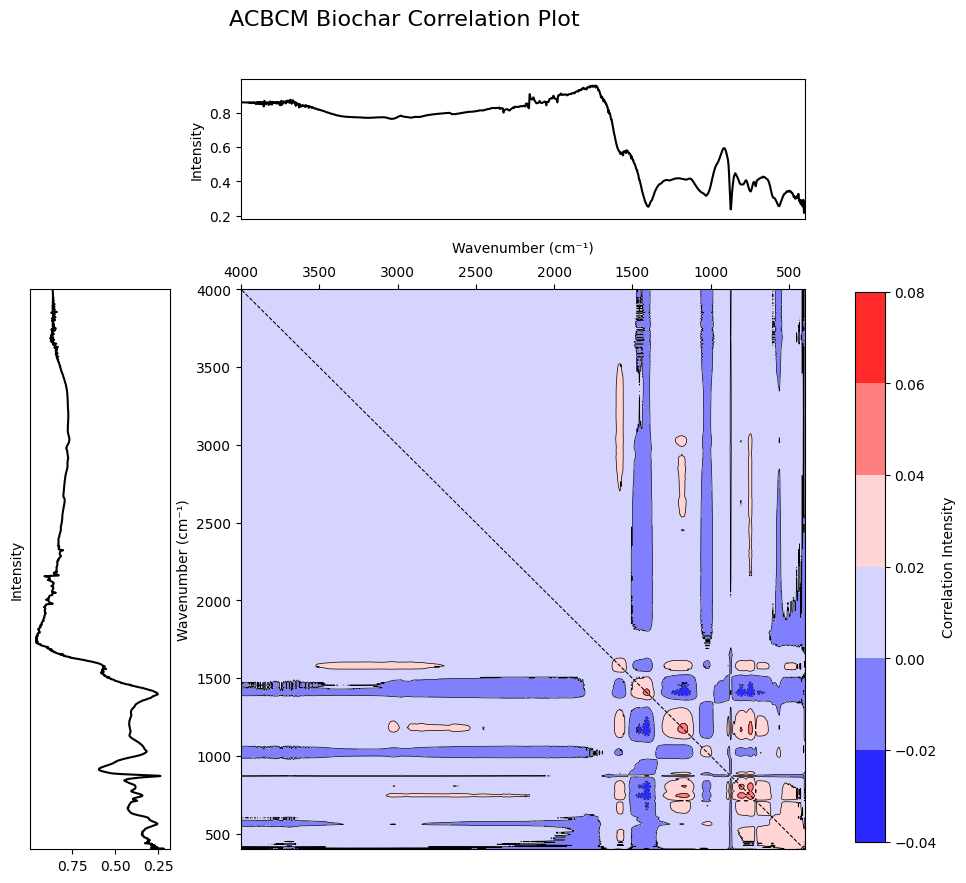

In [36]:
COS_Plot(hetero=False, title='ACBCM Biochar Correlation Plot', Input_path1='ACBCM_C.csv', 
         Correlation_path='ACBCM_C_sync.csv', levels=5,  colour=RuBu)

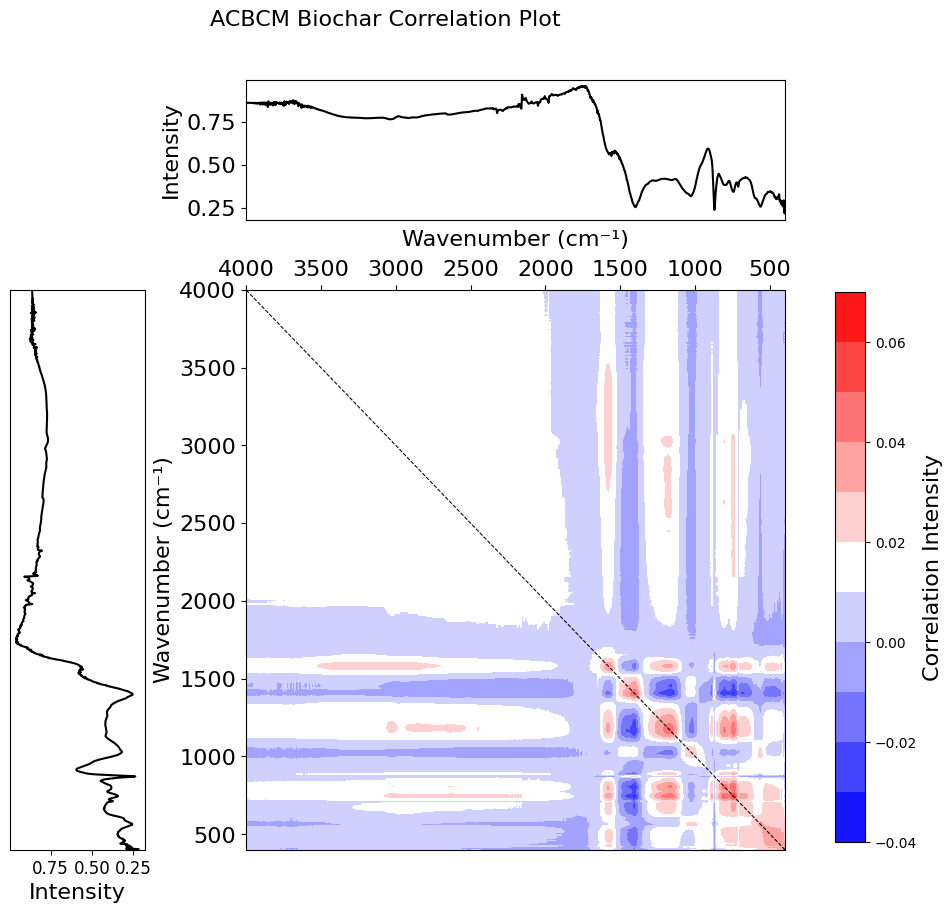

In [34]:
COS_Plot(hetero=False, title='ACBCM Biochar Correlation Plot', Input_path1='ACBCM_C.csv', 
         Correlation_path='ACBCM Mesh.csv', levels=10,  colour=RuBu, CLines=False)

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

def read_data(hetero, Input_path1, Input_path2, Correlation_path):
    
    # Read inputs and correlation .csv files
    Input_dat1 = pd.read_csv(Input_path1, skiprows=1, header=None)
    Input_dat2 = pd.read_csv(Input_path2, skiprows=1, header=None) if  hetero else None
    Corre_data = pd.read_csv(Correlation_path, header=None)
    
    Corre_x = Corre_data.iloc[0, 1:].astype(float).values
    Corre_y = Corre_data.iloc[1:, 0].astype(float).values
    Corre_d = Corre_data.iloc[1:, 1:].astype(float).values
    
    I_wav1 = Input_dat1.iloc[:, 0]
    I_val1 = Input_dat1.iloc[:, 1:]
    I_Avg1 = I_val1.mean(axis=1)
    
    if hetero:
        I_wav2 = Input_dat2.iloc[:, 0]
        I_val2 = Input_dat2.iloc[:, 1:]
        I_Avg2 = I_val2.mean(axis=1)
    else: 
        I_wav2 = None
        I_Avg2 = None
    
    Correlation = [Corre_x, Corre_y, Corre_d]
    Input = [I_wav1, I_Avg1, I_wav2, I_Avg2]
    
    return Correlation, Input

def COS_Plot(hetero=False, Input_path1=None, Input_path2=None, Correlation_path=None, 
             title="Untitled", colour='Viridis', levels=3, CLines=True):

    # Read data
    Corre_data, Input_data = read_data(hetero, Input_path1, Input_path2, Correlation_path)
    
    # Create correlation heatmap
    fig = px.imshow(Corre_data[2], x=Corre_data[0], y=Corre_data[1], 
                    color_continuous_scale=colour, title=title)
    fig.update_layout(xaxis_title="Wavenumber (cm⁻¹)", yaxis_title="Wavenumber (cm⁻¹)")
    
    # Add diagonal line
    fig.add_trace(go.Scatter(
        x=[Corre_data[0].min(), Corre_data[0].max()],
        y=[Corre_data[1].min(), Corre_data[1].max()],
        mode="lines", line=dict(color="black", dash="dash"), name="Diagonal"
    ))
    
    # Plot intensity data
    trace_top = go.Scatter(x=Input_data[0], y=Input_data[1], mode="lines", name="Intensity 1", line=dict(color="black"))
    fig.add_trace(trace_top)
    
    if hetero:
        trace_left = go.Scatter(x=Input_data[3], y=Input_data[2], mode="lines", name="Intensity 2", line=dict(color="black"))
    else:
        trace_left = go.Scatter(x=Input_data[1], y=Input_data[0], mode="lines", name="Intensity 1 (flipped)", line=dict(color="black"))
    
    fig.add_trace(trace_left)
    
    fig.show()


In [ ]:
COS_Plot(hetero=False, title='ACBCM Biochar Correlation Plot', Input_path1='ACBCM_C.csv', 
         Correlation_path='ACBCM Mesh.csv', levels=7,  colour='thermal', CLines=False)

C:\Users\Jackt\AppData\Local\Temp\ipykernel_10880\586783079.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Corre_data = pd.read_csv(Correlation_path, header=None)


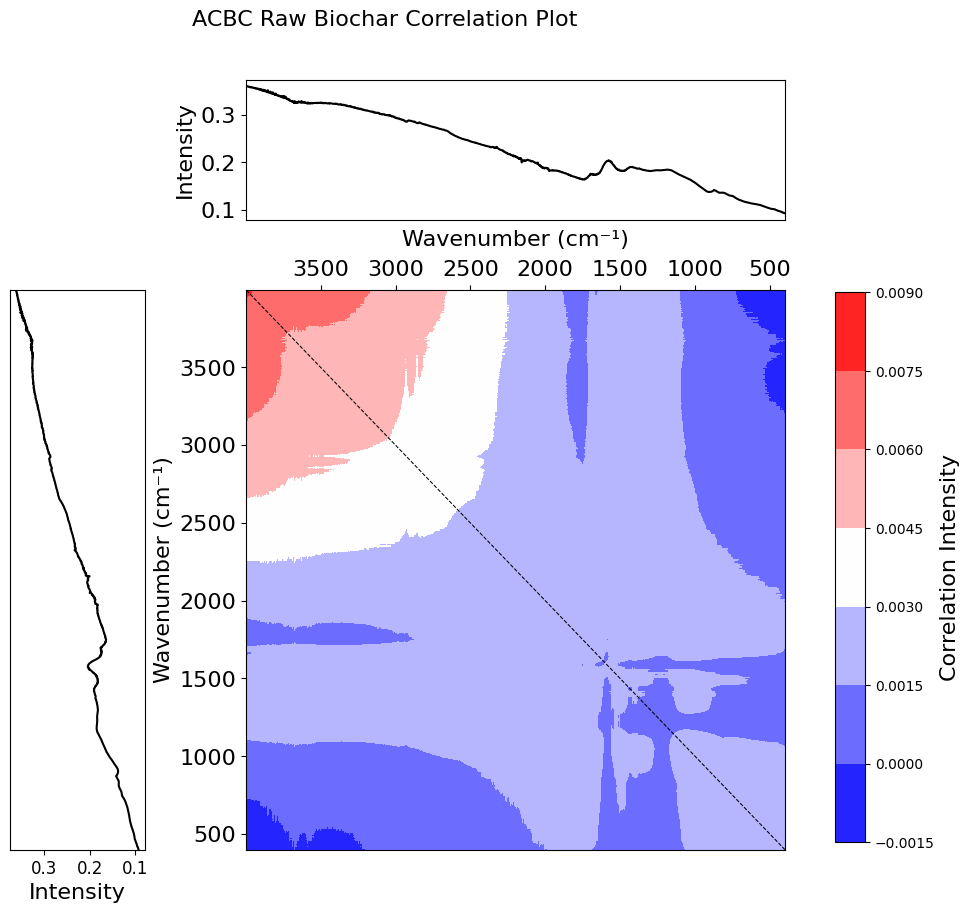

In [52]:
COS_Plot(hetero=False, title='ACBC Raw Biochar Correlation Plot', Input_path1='_2_Raw.csv', 
         Correlation_path='_2_Raw_sync.csv', levels=7,  colour=RuBu, CLines=False)

C:\Users\Jackt\AppData\Local\Temp\ipykernel_10880\586783079.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Corre_data = pd.read_csv(Correlation_path, header=None)


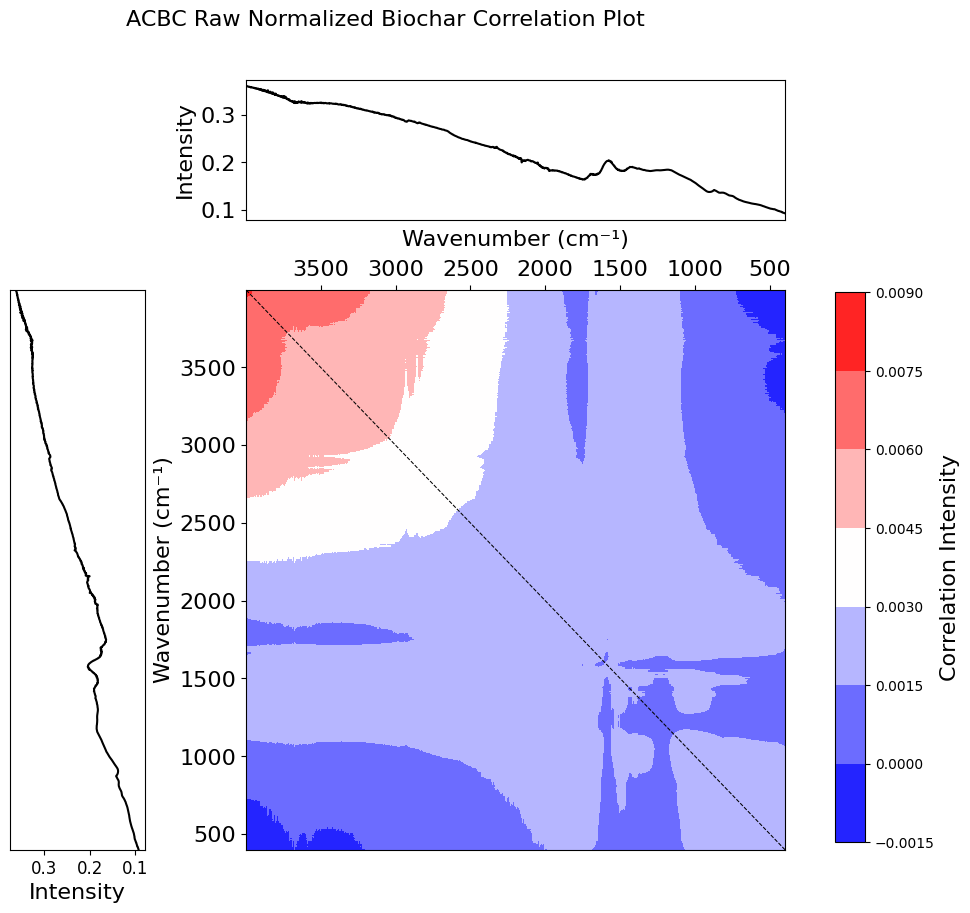

In [54]:
COS_Plot(hetero=False, title='ACBC Raw Normalized Biochar Correlation Plot', Input_path1='_2_Raw.csv', 
         Correlation_path='_2_Raw_sync.csv', levels=7,  colour=RuBu, CLines=False)

C:\Users\Jackt\AppData\Local\Temp\ipykernel_10880\586783079.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Corre_data = pd.read_csv(Correlation_path, header=None)


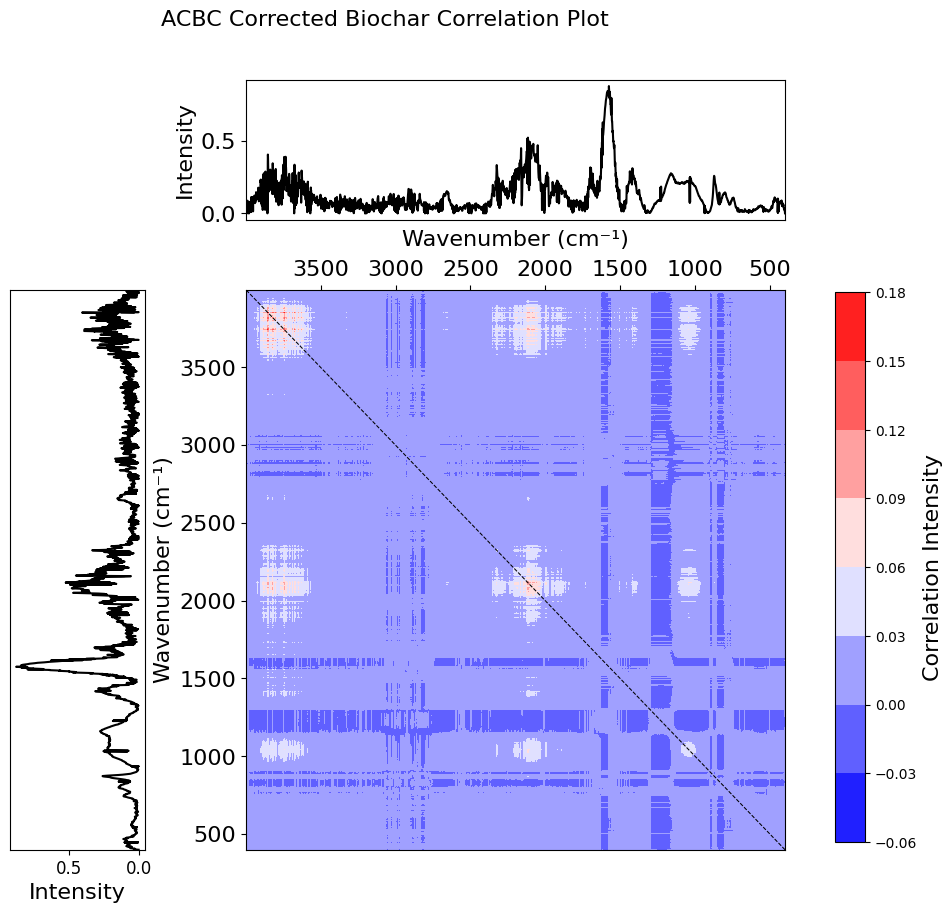

In [43]:
COS_Plot(hetero=False, title='ACBC Corrected Biochar Correlation Plot', Input_path1='ACBC_Ab.csv', 
         Correlation_path='2p_Ab_sync.csv', levels=7,  colour=RuBu, CLines=False)

C:\Users\Jackt\AppData\Local\Temp\ipykernel_10880\586783079.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Corre_data = pd.read_csv(Correlation_path, header=None)


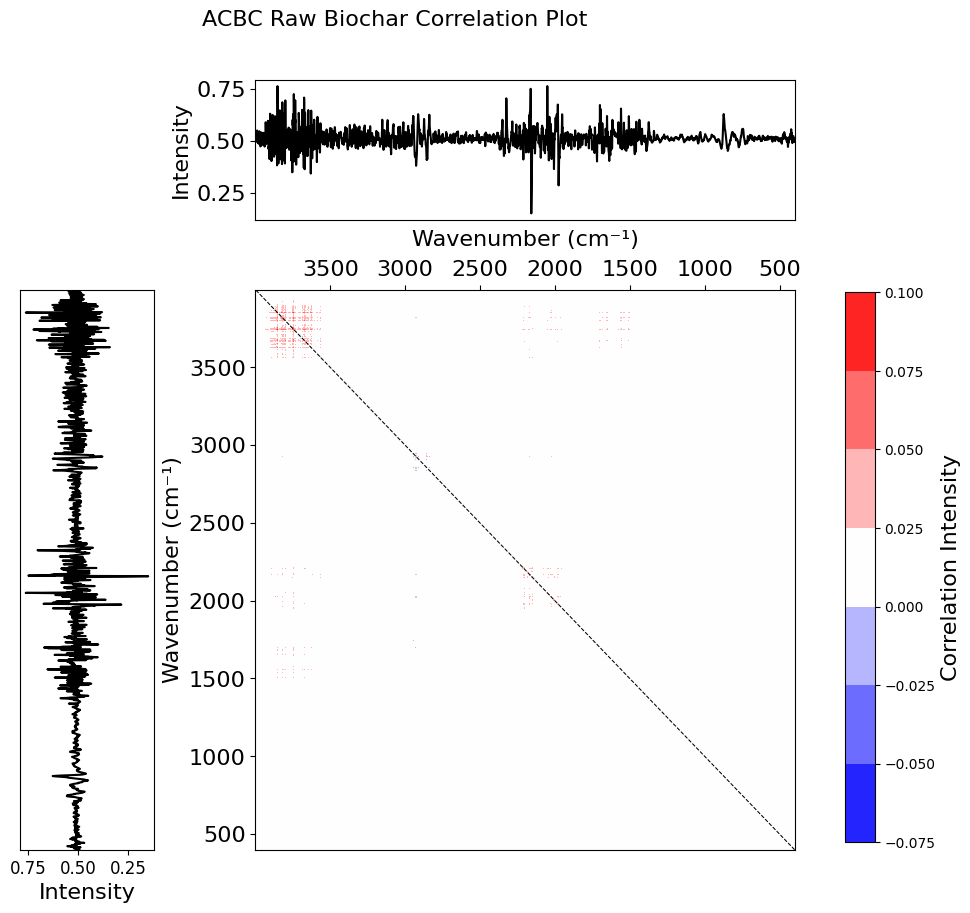

In [50]:
COS_Plot(hetero=False, title='ACBC Raw Biochar Correlation Plot', Input_path1='_2_Processed.csv', 
         Correlation_path='_2_Processed_sync.csv', levels=7,  colour=RuBu, CLines=False)